In [1]:
# Dependencies and Setup
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from local_settings import postgresql as settings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2


In [2]:
# Define a function for "get_engine"
def get_engine(user, passwd, host, port, db):
    url = f"postgresql://{user}:{passwd}@{host}:{port}/{db}"
    engine = create_engine(url, pool_size=50, echo=False)
    return engine

In [3]:
# Create an engine
engine = get_engine(settings['pguser'],
           settings['pgpasswd'],
           settings['pghost'],
           settings['pgport'],
           settings['pgdb']
          )

In [4]:
# Start a session to work with the database
session = sessionmaker(bind=engine)()

In [5]:
# Start a connection with the database
conn = engine.connect()

In [6]:
# Create a data frame "salaries" that reads all from the salaries table of the data base
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [7]:
# Create a data frame "titles" that reads all from the titles table of the data base
titles = pd.read_sql("SELECT * FROM titles", conn)
titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [8]:
# Create a data frame "employees" that reads all from the employees table of the data base
employees = pd.read_sql("SELECT * FROM employees", conn)
employees

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [9]:
# Change the column's name "emp_title_id" in the employees data frame to "title_id" to be merged on
employees = employees.rename(columns={'emp_title_id':'title_id'})
employees

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [10]:
# Merge both "employees" and "titles" on "title_id"
employees_titles_merged = pd.merge(employees, titles, on="title_id", how="left")
employees_titles_merged

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,Staff
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,Engineer
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,Engineer
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,Staff
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,Senior Engineer
...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,Staff
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995,Engineer
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988,Staff
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994,Staff


In [11]:
# Merge both "employees_titles_merged" and "salaries" on "emp_no"
all_merged = pd.merge(employees_titles_merged, salaries, on='emp_no', how='left')
all_merged

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,Staff,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,Engineer,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,Engineer,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,Staff,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,Senior Engineer,40000
...,...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,Staff,69696
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995,Engineer,75355
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988,Staff,61886
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994,Staff,62772


In [12]:
# Find max salary
max_salary = all_merged["salary"].max()
max_salary

129492

In [13]:
# Find min salary
min_salary = all_merged["salary"].min()
min_salary

40000

In [14]:
# Establish salary bins and group names as follows:
size_bins = [40000, 70000, 100000, 130000]

size_names = ["Low Income (40,000 - 70,000)", "Medium Income (70,000 - 100,000)", "High Income (100,000 - 130,000)"]

 
# Categorize salaries based on the bins.
all_merged["Salary"] = pd.cut(all_merged["salary"], size_bins, labels=size_names)

# Find average of salaries:
salaries_mean = all_merged.groupby(["Salary"]).mean()["salary"]

# Create a new "salary" data frame as follow:
salary_df = pd.DataFrame({
    "Average Salaries" : salaries_mean
    
})

# Print new data frame
salary_df

,Average Salaries
Salary,
"Low Income (40,000 - 70,000)",53517.302712
"Medium Income (70,000 - 100,000)",79352.307085
"High Income (100,000 - 130,000)",105633.825175


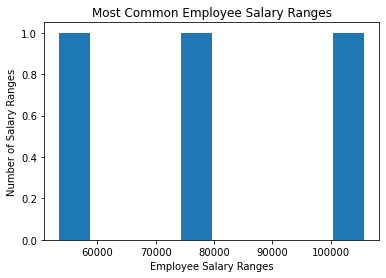

In [15]:
# Plot a hitogram for salary_df defined above
hist_fig = plt.hist(salary_df['Average Salaries'])
plt.title("Most Common Employee Salary Ranges")
plt.xlabel("Employee Salary Ranges")
plt.ylabel("Number of Salary Ranges")

# Save fig to the "Output" folder
plt.savefig("Output/Common Employee Salary Ranges.png")
plt.show()

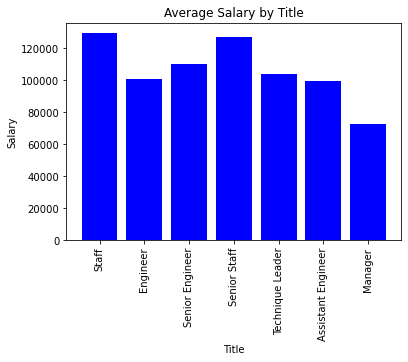

In [19]:
# Plot a bar chart for "Average Salary by Title"
bar_chart = plt.bar(all_merged["title"], all_merged["salary"], color="blue", align="center")
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Salary")
plt.xticks(rotation=90)

# Save fig to the "Output" folder
plt.savefig("Output/Average Salary by Title.png")
plt.show()